In [1]:
import torch
import torchvision
from einops import rearrange
from torchvision.transforms import Compose, Resize
import torchvision.transforms.functional as TF
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
from panaf.datasets import PanAfFullScene
from torchvision.transforms import Compose
from torchvision.transforms.v2 import (
    ConvertDtype,
    Normalize,
    RandAugment,
    TrivialAugmentWide,
)


/home/dl18206/anaconda3/envs/dataset-upgrade/lib/python3.8/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/dl18206/anaconda3/envs/dataset-upgrade/lib/python3.8/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedba

In [2]:
# Define transform
transform = Compose(
    [
        Resize((224, 224)),
        TrivialAugmentWide(),
        ConvertDtype(dtype=torch.float32),
        Normalize(mean=[0.5017, 0.5159, 0.5168], std=[0.2814, 0.2778, 0.2635]),
    ]
)


In [3]:
dataset = PanAfFullScene(
    data_prefix="/home/dl18206/Desktop/phd/data/panaf/acp/videos/all",
    data_csv="data/internal/splits/preliminary/train.csv",
    sequence_length=8,
    transform=transform,
)


In [4]:
loader = DataLoader(dataset, shuffle=False, batch_size=2)


In [7]:
x, y = next(iter(loader))


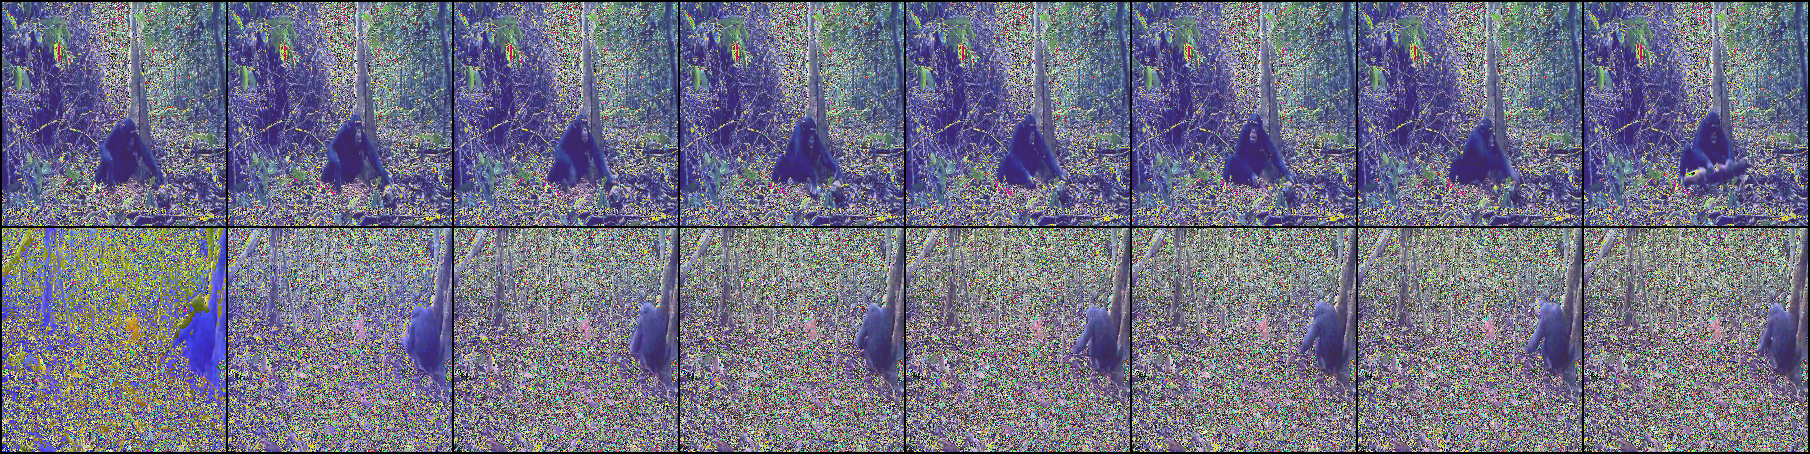

In [8]:
x = rearrange(x, "b t c h w -> (b t) c h w")
grid_images = make_grid(x, nrow=8)
grid_images_np = TF.to_pil_image(grid_images)
grid_images_np
